In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Set global parameters at the beginning
plt.rcParams['figure.dpi'] = 600  # Higher DPI for better resolution
plt.rcParams['savefig.dpi'] = 600  # Save with high DPI
plt.rcParams['figure.figsize'] = [8, 6]  # Adjust figure size if needed

import types
import numpy as np

# Import your modules
from dataset import PalindromeDataset
from lstm import LSTM
from utils import accuracy

# Fix for OpenMP error
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

%matplotlib inline

In [25]:
def train_and_track(config):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    # 1. Initialize Dataset
    full_dataset = PalindromeDataset(
        input_length=config.input_length,
        total_len=config.data_size,
        one_hot=True # Using One-Hot for stability
    )
    
    # 2. DataLoader
    train_loader = DataLoader(full_dataset, batch_size=config.batch_size, shuffle=True)
    
    # 3. Initialize Model
    model = LSTM(
        seq_length=config.input_length,
        input_dim=10, 
        hidden_dim=config.num_hidden,
        output_dim=config.num_classes
    ).to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.RMSprop(model.parameters(), lr=config.learning_rate)
    
    # Lists to store history
    history = {
        'loss': [],
        'accuracy': []
    }
    
    print(f"Training on {device}...")
    model.train()
    
    # 4. Training Loop
    total_steps = 0
    for epoch in range(config.max_epoch):
        for batch_inputs, batch_targets in train_loader:
            batch_inputs = batch_inputs.to(device)
            batch_targets = batch_targets.long().to(device)
            
            # Forward pass
            optimizer.zero_grad()
            logits = model(batch_inputs)
            loss = criterion(logits, batch_targets)
            
            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=config.max_norm)
            optimizer.step()
            
            # Record history
            acc = accuracy(logits, batch_targets)
            history['loss'].append(loss.item())
            history['accuracy'].append(acc)
            
            total_steps += 1
            
        # Early stop check (optional, to keep plots clean)
        if history['accuracy'][-1] == 1.0 and epoch > 3:
            print(f"Reached 100% accuracy at epoch {epoch+1}. Stopping.")
            break
            
    return history


Starting Experiment for Palindrome Length T=5
Setting total_len to the maximum possible length. 
Training on cuda...
Reached 100% accuracy at epoch 5. Stopping.


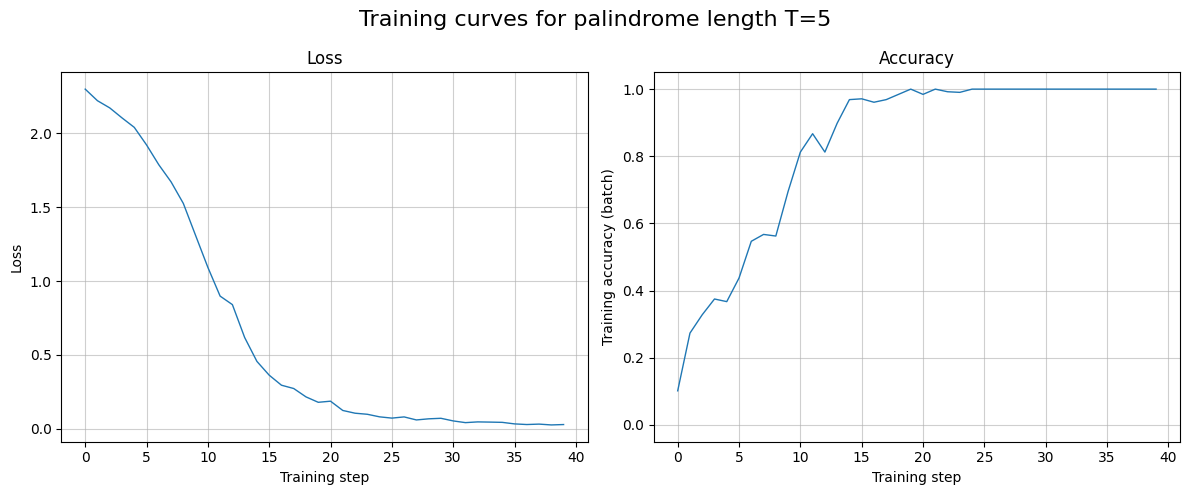


Starting Experiment for Palindrome Length T=10
Training on cuda...
Reached 100% accuracy at epoch 5. Stopping.


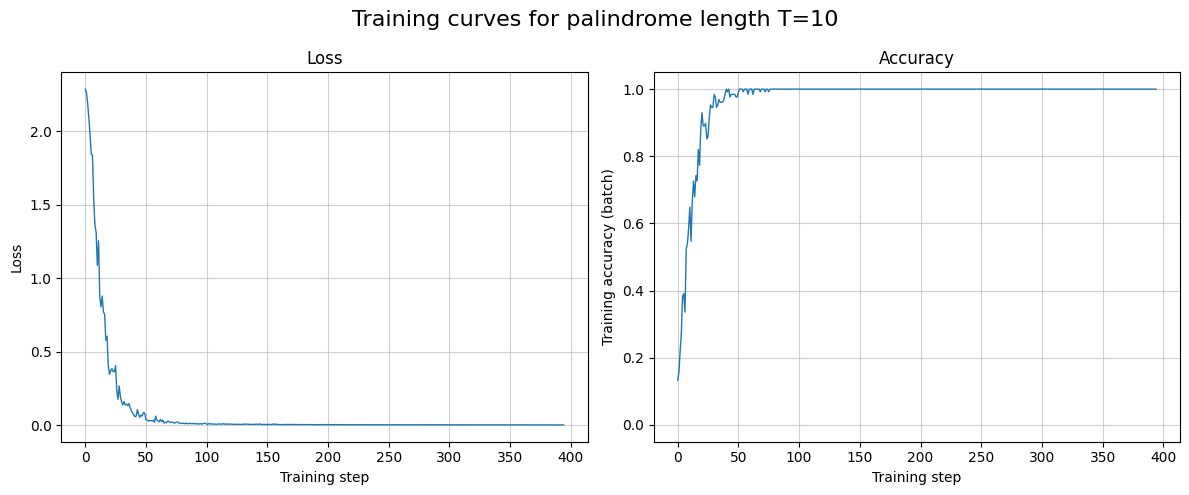


Starting Experiment for Palindrome Length T=15
Training on cuda...
Reached 100% accuracy at epoch 5. Stopping.


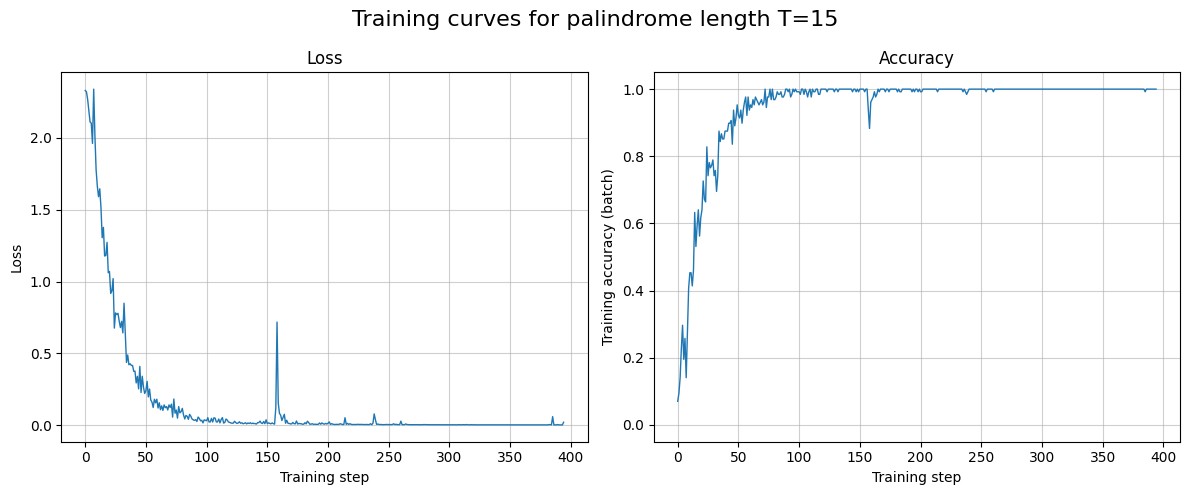


Starting Experiment for Palindrome Length T=20
Training on cuda...
Reached 100% accuracy at epoch 5. Stopping.


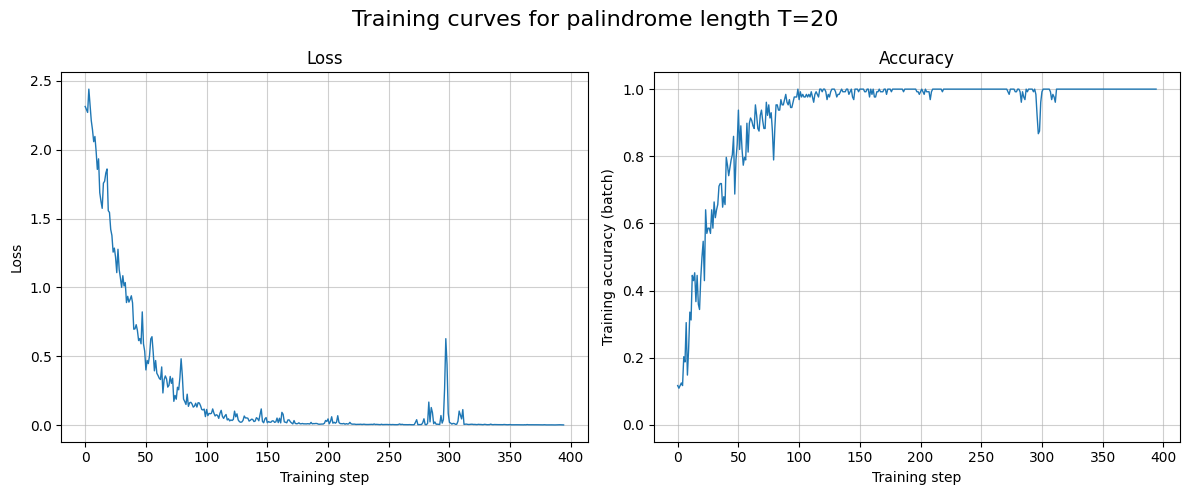


Starting Experiment for Palindrome Length T=25
Training on cuda...
Reached 100% accuracy at epoch 5. Stopping.


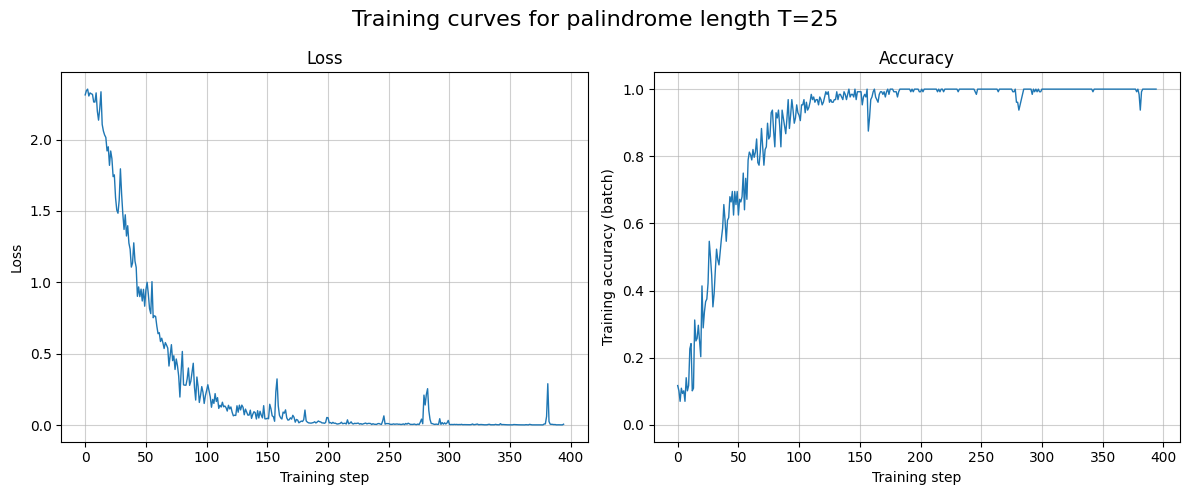


Starting Experiment for Palindrome Length T=30
Training on cuda...
Reached 100% accuracy at epoch 5. Stopping.


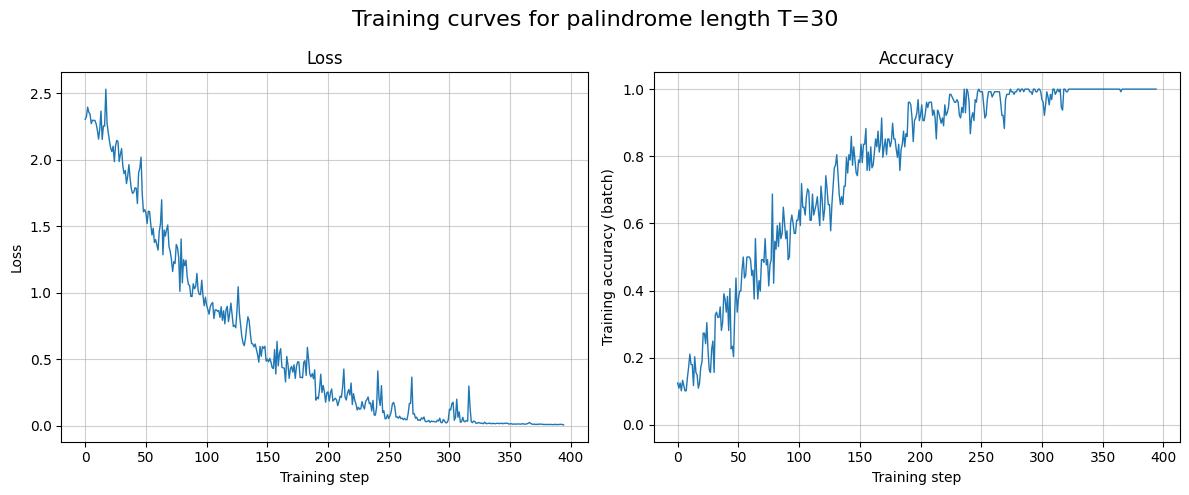

In [26]:
# Select the lengths you want to analyze (e.g., the difficult ones from the RNN task)
lengths_to_plot = [5, 10, 15, 20, 25, 30] 

for T in lengths_to_plot:
    print(f"\n" + "="*50)
    print(f"Starting Experiment for Palindrome Length T={T}")
    print(f"="*50)

    # Configuration
    config = types.SimpleNamespace(
        input_length=T-1,
        num_classes=10,
        num_hidden=128,
        batch_size=128,
        learning_rate=0.001,
        max_epoch=10,        # 10 epochs is usually enough for LSTM
        max_norm=10.0,
        data_size=10000      # Enough data to see a curve
    )

    # Run Training
    history = train_and_track(config)
    
    # --- PLOTTING ---
    steps = range(len(history['loss']))
    
    plt.figure(figsize=(12, 5), dpi=100)
    plt.suptitle(f"Training curves for palindrome length T={T}", fontsize=16)

    # Subplot 1: Loss
    plt.subplot(1, 2, 1)
    plt.plot(steps, history['loss'], color='tab:blue', linewidth=1)
    plt.xlabel("Training step")
    plt.ylabel("Loss")
    plt.title("Loss")
    plt.grid(True, alpha=0.6)

    # Subplot 2: Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(steps, history['accuracy'], color='tab:blue', linewidth=1)
    plt.xlabel("Training step")
    plt.ylabel("Training accuracy (batch)")
    plt.title("Accuracy")
    plt.grid(True, alpha=0.6)
    plt.ylim(-0.05, 1.05) # Keep accuracy between 0 and 1

    plt.tight_layout()
    plt.show()

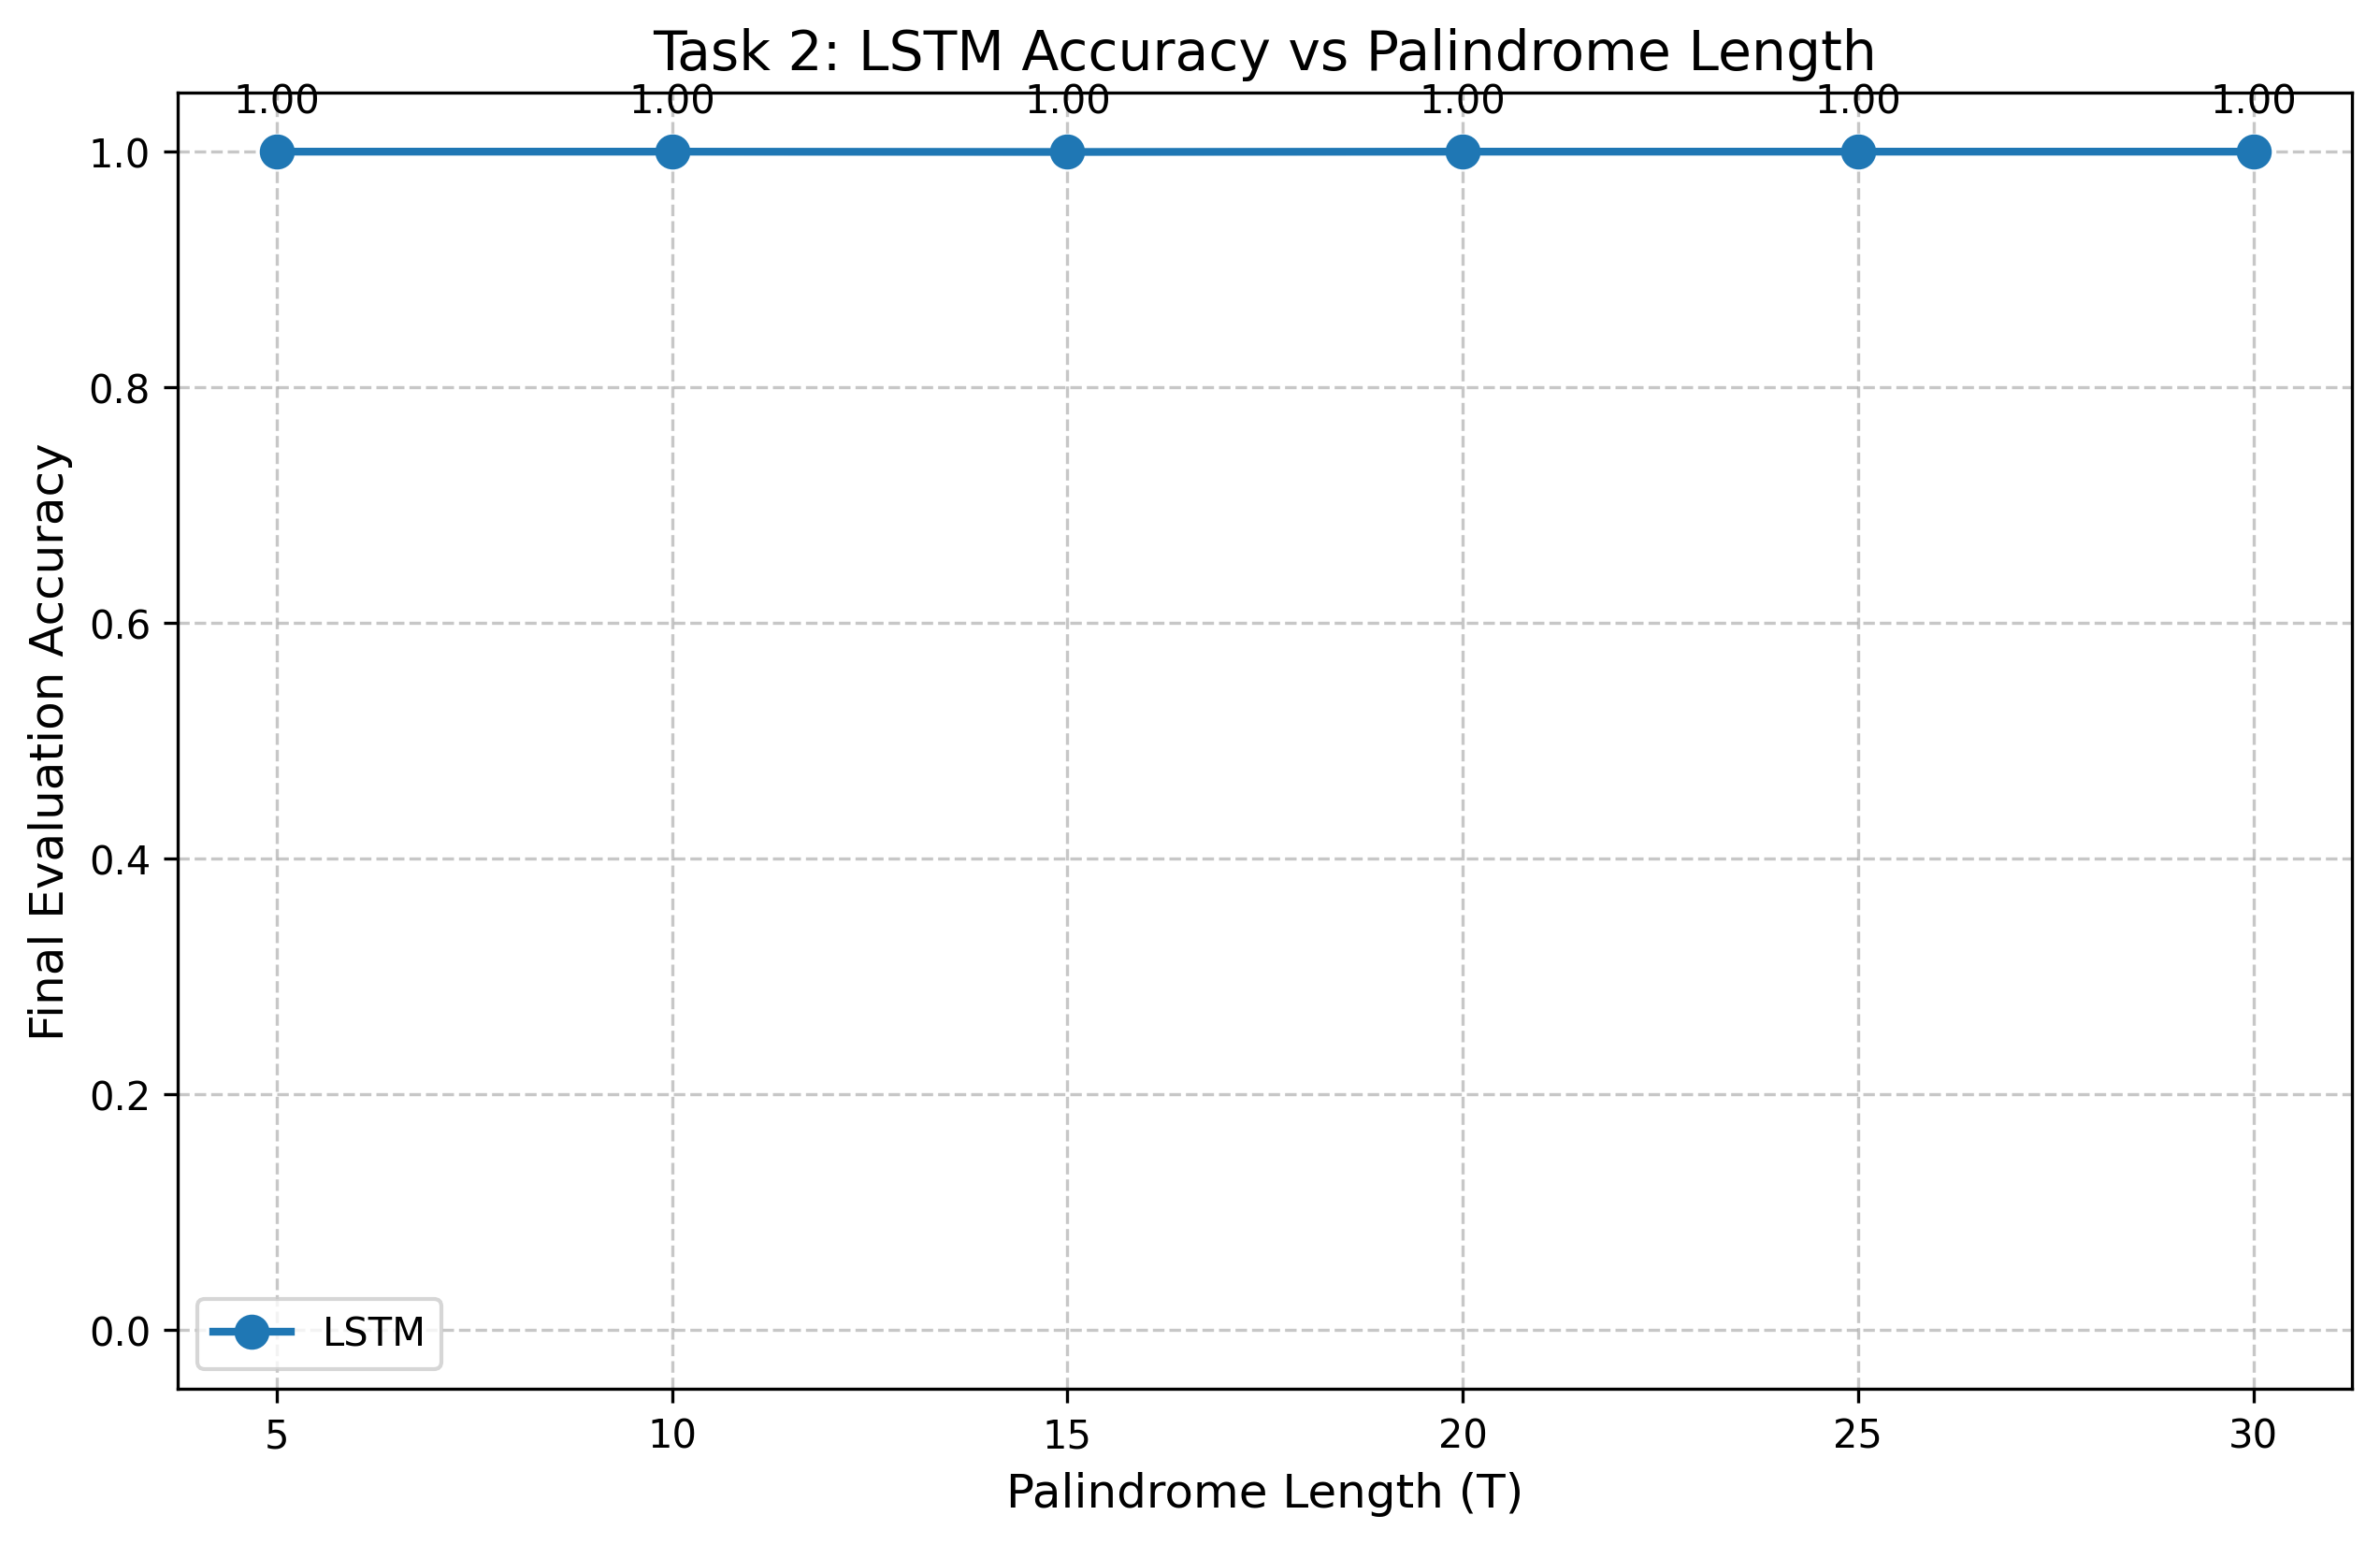

In [27]:
import matplotlib.pyplot as plt

# Ensure these lists are populated from your experiment loop
# lengths = [5, 10, 15, 20, 25, 30]
# accuracies = [ ... values collected from training ... ]

plt.figure(figsize=(10, 6), dpi=300)

# Plotting the data
plt.plot(lengths, accuracies, marker='o', linewidth=2, markersize=8, label='LSTM')

# Styling the plot to match your screenshot
plt.title('Task 2: LSTM Accuracy vs Palindrome Length', fontsize=14)
plt.xlabel('Palindrome Length (T)', fontsize=12)
plt.ylabel('Final Evaluation Accuracy', fontsize=12)

# Grid and Axis limits
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-0.05, 1.05)  # Ranges from 0 to 1.05 so the top line isn't cut off
plt.xticks(lengths)    # Ensure the x-axis shows exactly 5, 10, 15...

# Add the text labels (e.g. "1.00") above each dot
for i, acc in enumerate(accuracies):
    plt.annotate(f"{acc:.2f}", 
                 (lengths[i], accuracies[i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center')

plt.legend()
plt.show()